## Residual Networks Models
Blablabla
### Installation and Import Checks

In [3]:
%pip install tensorflow==2.10
%pip install scikit-learn
%pip install matplotlib
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
# Machine Learning
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, ResNet152
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# Plotting
import matplotlib.pyplot as plt

ImportError: cannot import name 'ResNet34' from 'tensorflow.keras.applications' (c:\Users\Matthew Chuang\Documents\Github\CSC3009-Brain-Tumor-Detection\dependencies\lib\site-packages\keras\api\_v2\keras\applications\__init__.py)

### Optional: GPU Acceleration Check
Checks Tensorflow Version and GPU detection. 
If GPU detected, output should be something like "Num GPUs Available:  1"

In [ ]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices()
print("Physical Devices:", physical_devices)

TensorFlow version: 2.10.0
Num GPUs Available:  1
Physical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Load and Split Prepared Data
Loads in preprocessed data from the ./prepared_data directory for x and y features. Splits for training and testing 80/20 ratio

In [ ]:
# Load the data
x_input = np.load('prepared_data/x_input_combined.npy')
y_output = np.load('prepared_data/y_output_combined.npy')

# Ensure y is one-hot encoded if not already
y_output = to_categorical(y_output, num_classes=4)  # Assuming there are 4 classes
# Resizes images to 224 x 224 for optimal size for VGG models
x_input_resized = np.array([tf.image.resize(image, (224, 224)).numpy() for image in x_input])

# Split the data into training and testing sets
x_input_train, x_input_test, y_output_train, y_output_test = train_test_split(x_input_resized, y_output, test_size=0.2, random_state=42)

# Printing Dimensions of data
print(f'X Training Data\nNumber of Rows: {x_input_train.shape[0]}\nPixel Dimensions: {x_input_train.shape[1]}x{x_input_train.shape[2]}x{x_input_train.shape[3]}\n')
print(f'Y Training Data\nNumber of Rows: {y_output_train.shape[0]}\nNumber of Classes: {y_output_train.shape[1]}\n')
print(f'X Testing Data\nNumber of Rows: {x_input_test.shape[0]}\nPixel Dimensions: {x_input_test.shape[1]}x{x_input_test.shape[2]}x{x_input_test.shape[3]}\n')
print(f'Y Training Data\nNumber of Rows: {y_output_test.shape[0]}\nNumber of Classes: {y_output_test.shape[1]}')

X Training Data
Number of Rows: 1536
Pixel Dimensions: 128x128x3

Y Training Data
Number of Rows: 1536
Number of Classes: 4

X Testing Data
Number of Rows: 384
Pixel Dimensions: 128x128x3

Y Training Data
Number of Rows: 384
Number of Classes: 4


In [ ]:
# # Data augmentation
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True
# )

# val_datagen = ImageDataGenerator()

# train_generator = train_datagen.flow(x_input_train, y_output_train, batch_size=32)
# val_generator = val_datagen.flow(x_input_test, y_output_test, batch_size=32)

### Loading and Defining ResNet Models

In [ ]:
# Load the ResNet50 model pre-trained on ImageNet
base_resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adds global average pooling layer to reduce dimensions of features     
pooled_output_50 = GlobalAveragePooling2D()(base_resnet50_model.output)
# Adds a dense lyaer with 1024 neurons using RELU activation function     
dense_layer_50 = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(pooled_output_50)
# Add dropout layer with 50% dropout rate for regularization to avoid overfitting 
dropout_layer_50 = Dropout(0.6)(dense_layer_50)
# Add final output layer with four neurons corresponding to four classes with activation as softmax to predict probability of each class
output_layer_50 = Dense(4, activation='softmax')(dropout_layer_50)  # 4 classes: no tumor, glioma, meningioma, pituitary

# Define the model
resnet50_brain_tumor_model = Model(inputs=base_resnet50_model.input, outputs=output_layer_50)

# # Freeze the layers of the base model
for layer in resnet50_brain_tumor_model.layers:
    layer.trainable = False

# # Freeze the initial layers of the base model, unfreeze the top layers for fine-tuning
# for layer in base_resnet50_model.layers[:-20]:  # Unfreeze the last 20 layers
#     layer.trainable = False
# for layer in base_resnet50_model.layers[-20:]:  # Freeze all the other layers
#     layer.trainable = True

In [ ]:
# # Load the ResNet50 model pre-trained on ImageNet
# base_resnet152_model = ResNet152(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# # Adds global average pooling layer to reduce dimensions of features     
# pooled_output_152 = GlobalAveragePooling2D()(base_resnet152_model.output)
# # Adds a dense lyaer with 1024 neurons using RELU activation function     
# dense_layer_152 = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(pooled_output_152)
# # Add dropout layer with 50% dropout rate for regularization to avoid overfitting 
# dropout_layer_152 = Dropout(0.6)(dense_layer_152)
# # Add final output layer with four neurons corresponding to four classes with activation as softmax to predict probability of each class
# output_layer_152 = Dense(4, activation='softmax')(dropout_layer_152)  # 4 classes: no tumor, glioma, meningioma, pituitary

# # Define the model
# resnet152_brain_tumor_model = Model(inputs=base_resnet152_model.input, outputs=output_layer_152)

# # # Freeze the layers of the base model
# # for layer in resnet152_brain_tumor_model.layers:
# #     layer.trainable = False

# # Freeze the initial layers of the base model, unfreeze the top layers for fine-tuning
# for layer in resnet152_brain_tumor_model.layers[:-20]:  # Unfreeze the last 20 layers
#     layer.trainable = False
# for layer in resnet152_brain_tumor_model.layers[-20:]:  # Freeze all the other layers
#     layer.trainable = True

### Training the ResNet Models

In [ ]:
# Compile the model
# resnet50_brain_tumor_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_brain_tumor_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint_resnet50 = ModelCheckpoint('model_checkpoints/resnet50_brain_tumor_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping_resnet50 = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the model
# trained_resnet50_model = resnet50_brain_tumor_model.fit(train_generator, epochs=50, validation_data=val_generator, 
#                                                 callbacks=[checkpoint_resnet50, early_stopping_resnet50])
trained_resnet50_model = resnet50_brain_tumor_model.fit(x_input_train, y_output_train, epochs=50, validation_data=(x_input_test, y_output_test), 
                                                callbacks=[checkpoint_resnet50, early_stopping_resnet50])

Epoch 1/50
46/48 [===========================>..] - ETA: 0s - loss: 13.8320 - accuracy: 0.5442
Epoch 1: val_loss improved from inf to 13.20851, saving model to model_checkpoints\resnet50_brain_tumor_model.keras
48/48 [==============================] - 3s 41ms/step - loss: 13.7824 - accuracy: 0.5475 - val_loss: 13.2085 - val_accuracy: 0.2240
Epoch 2/50
46/48 [===========================>..] - ETA: 0s - loss: 11.6549 - accuracy: 0.6800
Epoch 2: val_loss improved from 13.20851 to 11.44189, saving model to model_checkpoints\resnet50_brain_tumor_model.keras
48/48 [==============================] - 1s 31ms/step - loss: 11.6252 - accuracy: 0.6777 - val_loss: 11.4419 - val_accuracy: 0.2240
Epoch 3/50
46/48 [===========================>..] - ETA: 0s - loss: 9.9765 - accuracy: 0.7147 
Epoch 3: val_loss improved from 11.44189 to 9.96623, saving model to model_checkpoints\resnet50_brain_tumor_model.keras
48/48 [==============================] - 1s 31ms/step - loss: 9.9487 - accuracy: 0.7142 - val_

In [ ]:
# # Compile the model
# # resnet152_brain_tumor_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# resnet152_brain_tumor_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


# # Define callbacks
# checkpoint_resnet152 = ModelCheckpoint('model_checkpoints/resnet152_brain_tumor_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
# early_stopping_resnet152 = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# # Train the model
# trained_resnet152_model = resnet152_brain_tumor_model.fit(x_input_train, y_output_train, epochs=50, validation_data=(x_input_test, y_output_test), 
#                                                 callbacks=[checkpoint_resnet152, early_stopping_resnet152])

Epoch 1/50
47/48 [============================>.] - ETA: 0s - loss: 13.7353 - accuracy: 0.4794
Epoch 1: val_loss improved from inf to 12.86576, saving model to model_checkpoints\resnet152_brain_tumor_model.keras
48/48 [==============================] - 7s 88ms/step - loss: 13.7046 - accuracy: 0.4831 - val_loss: 12.8658 - val_accuracy: 0.2917
Epoch 2/50
47/48 [============================>.] - ETA: 0s - loss: 11.3537 - accuracy: 0.6403
Epoch 2: val_loss improved from 12.86576 to 10.97691, saving model to model_checkpoints\resnet152_brain_tumor_model.keras
48/48 [==============================] - 3s 60ms/step - loss: 11.3353 - accuracy: 0.6406 - val_loss: 10.9769 - val_accuracy: 0.2917
Epoch 3/50
47/48 [============================>.] - ETA: 0s - loss: 9.4918 - accuracy: 0.6908
Epoch 3: val_loss improved from 10.97691 to 9.39812, saving model to model_checkpoints\resnet152_brain_tumor_model.keras
48/48 [==============================] - 3s 59ms/step - loss: 9.4762 - accuracy: 0.6908 - va

### Plotting ResNet Model Performances

In [ ]:
def plot_model_performance(history, title):
    """
    Plot training and validation loss and accuracy.

    Parameters:
    - history: Keras History object
    - title: str, title of the plot
    """
    # Statistics
    for epoch in range(len(history.history['loss'])):
        print(f"Epoch {epoch + 1}:")
        print(f"  Training Loss: {history.history['loss'][epoch]:.4f}")
        print(f"  Validation Loss: {history.history['val_loss'][epoch]:.4f}")
        print(f"  Training Accuracy: {history.history['accuracy'][epoch]:.4f}")
        print(f"  Validation Accuracy: {history.history['val_accuracy'][epoch]:.4f}")
        print("-" * 40)

    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Fix the accuracy scale from 0 to 1
    plt.legend()

    plt.suptitle(title)
    plt.show()

Epoch 1:
  Training Loss: 13.7824
  Validation Loss: 13.2085
  Training Accuracy: 0.5475
  Validation Accuracy: 0.2240
----------------------------------------
Epoch 2:
  Training Loss: 11.6252
  Validation Loss: 11.4419
  Training Accuracy: 0.6777
  Validation Accuracy: 0.2240
----------------------------------------
Epoch 3:
  Training Loss: 9.9487
  Validation Loss: 9.9662
  Training Accuracy: 0.7142
  Validation Accuracy: 0.2891
----------------------------------------
Epoch 4:
  Training Loss: 8.4925
  Validation Loss: 8.7029
  Training Accuracy: 0.7669
  Validation Accuracy: 0.3542
----------------------------------------
Epoch 5:
  Training Loss: 7.3129
  Validation Loss: 7.7268
  Training Accuracy: 0.7878
  Validation Accuracy: 0.3568
----------------------------------------
Epoch 6:
  Training Loss: 6.3039
  Validation Loss: 6.9507
  Training Accuracy: 0.8216
  Validation Accuracy: 0.4219
----------------------------------------
Epoch 7:
  Training Loss: 5.4829
  Validation Lo

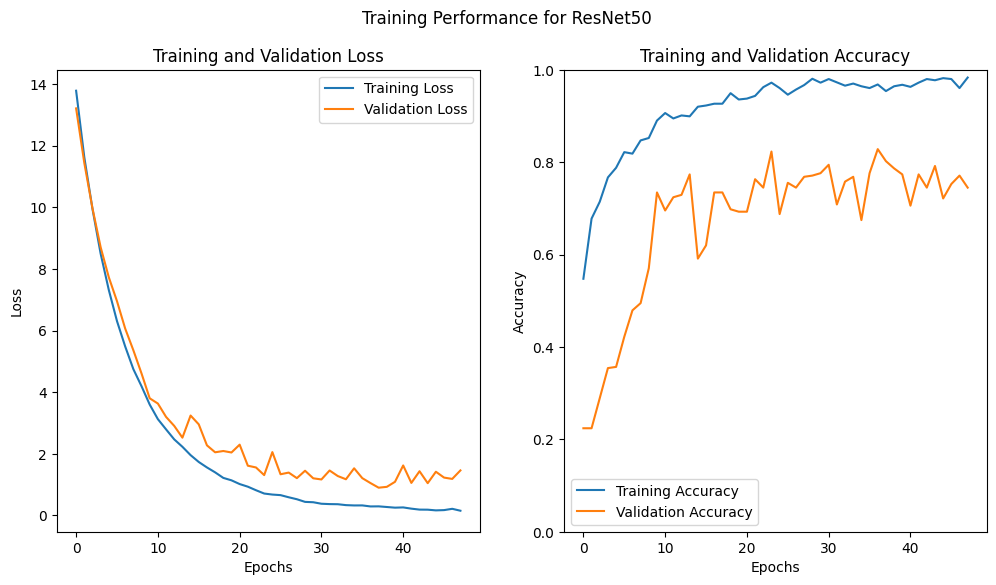

Epoch 1:
  Training Loss: 13.7046
  Validation Loss: 12.8658
  Training Accuracy: 0.4831
  Validation Accuracy: 0.2917
----------------------------------------
Epoch 2:
  Training Loss: 11.3353
  Validation Loss: 10.9769
  Training Accuracy: 0.6406
  Validation Accuracy: 0.2917
----------------------------------------
Epoch 3:
  Training Loss: 9.4762
  Validation Loss: 9.3981
  Training Accuracy: 0.6908
  Validation Accuracy: 0.3255
----------------------------------------
Epoch 4:
  Training Loss: 7.8636
  Validation Loss: 8.6001
  Training Accuracy: 0.7598
  Validation Accuracy: 0.3203
----------------------------------------
Epoch 5:
  Training Loss: 6.5890
  Validation Loss: 7.5737
  Training Accuracy: 0.8034
  Validation Accuracy: 0.3516
----------------------------------------
Epoch 6:
  Training Loss: 5.5130
  Validation Loss: 6.4992
  Training Accuracy: 0.8418
  Validation Accuracy: 0.4635
----------------------------------------
Epoch 7:
  Training Loss: 4.6460
  Validation Lo

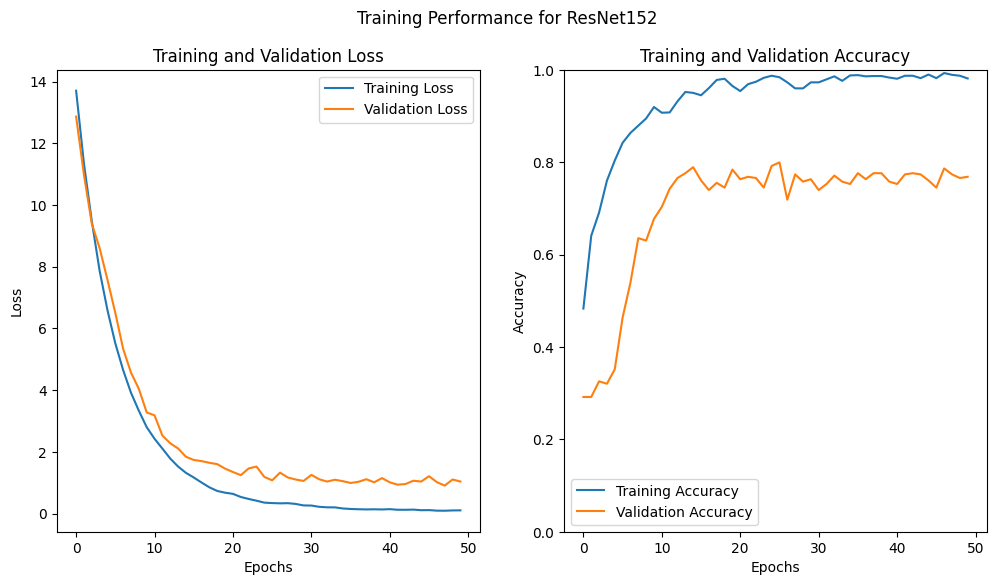

In [ ]:
plot_model_performance(trained_resnet50_model, "Training Performance for ResNet50")
# plot_model_performance(trained_resnet152_model, "Training Performance for ResNet152")